In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [42]:
data_test = pd.read_csv('merge_data_2019.csv')
df_RF = pd.read_csv('predictions_RF.csv')
df_GWR = pd.read_csv('predictions_GWR.csv')
df_step = pd.read_csv('predictions_step.csv')
df_GWR['GWR']

0        1.603473
1        0.000000
2        0.000000
3        0.039026
4        0.000000
           ...   
39995    1.378766
39996    3.279509
39997    3.266569
39998    0.599934
39999    0.000000
Name: GWR, Length: 40000, dtype: float64

In [43]:
df_for_visualize = pd.DataFrame({
    'y_pred_rf' : df_RF['Predicted'],
    'y_pred_gwr' : df_GWR['GWR'],
    'y_pred_step' : df_step['y_pred'],
    'col': data_test['Column Position'],
    'row': data_test['Row Position']
})
df_for_visualize

,y_pred_rf,y_pred_gwr,y_pred_step,col,row
0,0.066000,1.603473,1.904419,109,16
1,0.884467,0.000000,-0.271116,69,83
2,0.050500,0.000000,-0.262341,18,82
3,0.004000,0.039026,-0.050783,173,7
4,0.607000,0.000000,0.238996,235,77
...,...,...,...,...,...
39995,0.131167,1.378766,1.473952,103,20
39996,0.006000,3.279509,2.758788,135,20
39997,0.857800,3.266569,2.336991,129,21
39998,0.039000,0.599934,4.274359,121,67


Nếu như gán các giá trị dự đoán lớn hơn 1 về 1 để visualize

In [44]:
df_for_visualize['y_pred_rf'] = df_for_visualize['y_pred_rf'].clip(lower=0, upper=1)
df_for_visualize['y_pred_gwr'] = df_for_visualize['y_pred_gwr'].clip(lower=0, upper=1)
df_for_visualize['y_pred_step'] = df_for_visualize['y_pred_step'].clip(lower=0, upper=1)
df_for_visualize

,y_pred_rf,y_pred_gwr,y_pred_step,col,row
0,0.066000,1.000000,1.000000,109,16
1,0.884467,0.000000,0.000000,69,83
2,0.050500,0.000000,0.000000,18,82
3,0.004000,0.039026,0.000000,173,7
4,0.607000,0.000000,0.238996,235,77
...,...,...,...,...,...
39995,0.131167,1.000000,1.000000,103,20
39996,0.006000,1.000000,1.000000,135,20
39997,0.857800,1.000000,1.000000,129,21
39998,0.039000,0.599934,1.000000,121,67


Nếu như chuẩn hóa tập dữ liệu đầu ra về khoảng 0,1 để visualize

In [41]:
from sklearn.preprocessing import MinMaxScaler
values_2d_rf = np.array(df_for_visualize['y_pred_rf']).reshape(-1, 1)
values_2d_gwr = np.array(df_for_visualize['y_pred_gwr']).reshape(-1, 1)
values_2d_step = np.array(df_for_visualize['y_pred_step']).reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_values_rf = scaler.fit_transform(values_2d_rf)
normalized_values_gwr = scaler.fit_transform(values_2d_gwr)
normalized_values_step = scaler.fit_transform(values_2d_step)

# Convert the normalized values back to a 1D array
df_for_visualize['y_pred_rf'] = normalized_values_rf.flatten()
df_for_visualize['y_pred_gwr'] = normalized_values_gwr.flatten()
df_for_visualize['y_pred_step'] = normalized_values_step.flatten()
df_for_visualize

,y_pred_rf,y_pred_gwr,y_pred_step,col,row
0,0.066000,1.000000,1.000000,109,16
1,0.884467,0.000000,0.000000,69,83
2,0.050500,0.000000,0.000000,18,82
3,0.004000,0.039026,0.000000,173,7
4,0.607000,0.000000,0.238996,235,77
...,...,...,...,...,...
39995,0.131167,1.000000,1.000000,103,20
39996,0.006000,1.000000,1.000000,135,20
39997,0.857800,1.000000,1.000000,129,21
39998,0.039000,0.599934,1.000000,121,67


visualize cho RF

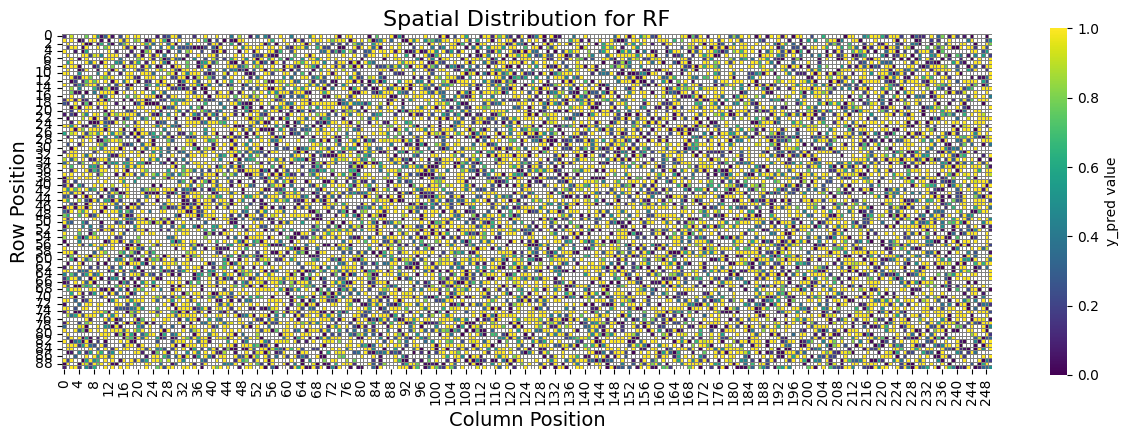

In [54]:
# Get the maximum row and column positions to define the matrix size
max_row = df_for_visualize['row'].max()
max_col = df_for_visualize['col'].max()

# Create an empty matrix filled with NaNs (will represent missing values)
matrix = np.full((max_row + 1, max_col + 1), np.nan)

# Fill the matrix with the y_pred values at the corresponding positions
for _, row in df_for_visualize.iterrows():
    matrix[row['row'].astype(int), row['col'].astype(int)] = row['y_pred_rf']

# Create the heatmap with adjusted size and font size
plt.figure(figsize=(15, 9))  # Điều chỉnh kích thước biểu đồ
cmap = sns.color_palette("viridis", as_cmap=True)

# Use seaborn to create a heatmap
sns.heatmap(matrix, cmap=cmap, cbar=True, linewidths=.5, linecolor='gray', square=True,
            mask=np.isnan(matrix), cbar_kws={'label': 'y_pred value', 'shrink': 0.5})

# Set titles and labels with adjusted font size
plt.title('Spatial Distribution for RF', fontsize=16)  # Điều chỉnh kích thước chữ
plt.xlabel('Column Position', fontsize=14)  # Điều chỉnh kích thước chữ
plt.ylabel('Row Position', fontsize=14)  # Điều chỉnh kích thước chữ

# Show the plot
plt.show()

visualize cho GWR

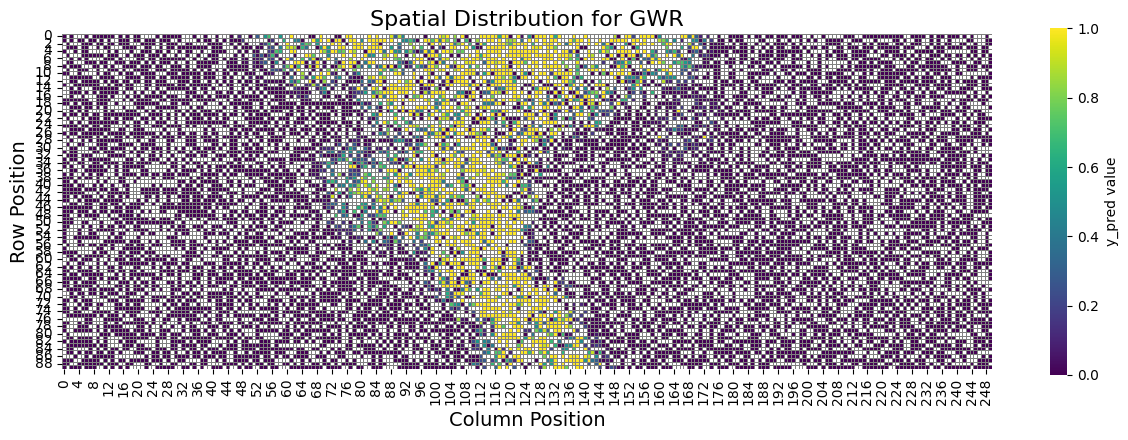

In [53]:
# Get the maximum row and column positions to define the matrix size
max_row = df_for_visualize['row'].max()
max_col = df_for_visualize['col'].max()

# Create an empty matrix filled with NaNs (will represent missing values)
matrix = np.full((max_row + 1, max_col + 1), np.nan)

# Fill the matrix with the y_pred values at the corresponding positions
for _, row in df_for_visualize.iterrows():
    matrix[row['row'].astype(int), row['col'].astype(int)] = row['y_pred_gwr']

# Create the heatmap with adjusted size and font size
plt.figure(figsize=(15, 9))  # Điều chỉnh kích thước biểu đồ
cmap = sns.color_palette("viridis", as_cmap=True)

# Use seaborn to create a heatmap
sns.heatmap(matrix, cmap=cmap, cbar=True, linewidths=.5, linecolor='gray', square=True,
            mask=np.isnan(matrix), cbar_kws={'label': 'y_pred value', 'shrink': 0.5})

# Set titles and labels with adjusted font size
plt.title('Spatial Distribution for GWR', fontsize=16)  # Điều chỉnh kích thước chữ
plt.xlabel('Column Position', fontsize=14)  # Điều chỉnh kích thước chữ
plt.ylabel('Row Position', fontsize=14)  # Điều chỉnh kích thước chữ

# Show the plot
plt.show()

visualize cho STEP

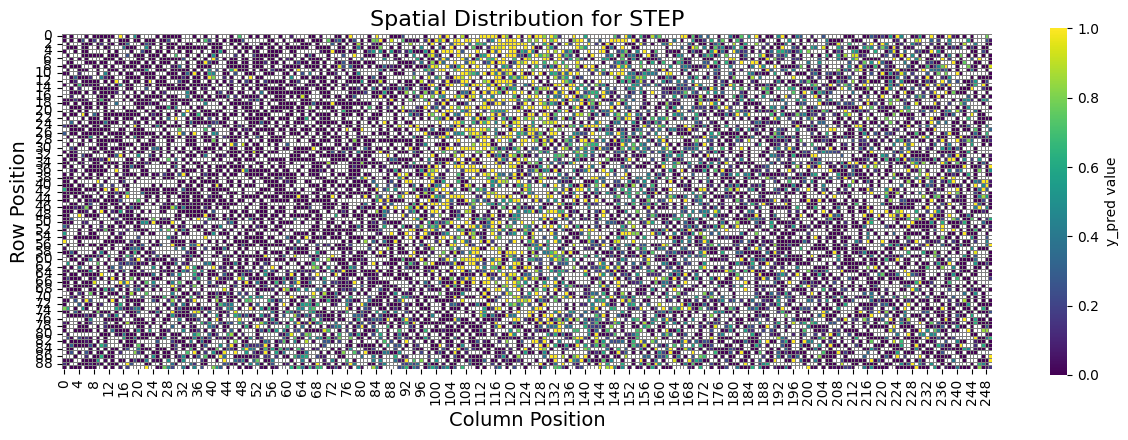

In [55]:
# Get the maximum row and column positions to define the matrix size
max_row = df_for_visualize['row'].max()
max_col = df_for_visualize['col'].max()

# Create an empty matrix filled with NaNs (will represent missing values)
matrix = np.full((max_row + 1, max_col + 1), np.nan)

# Fill the matrix with the y_pred values at the corresponding positions
for _, row in df_for_visualize.iterrows():
    matrix[row['row'].astype(int), row['col'].astype(int)] = row['y_pred_step']

# Create the heatmap with adjusted size and font size
plt.figure(figsize=(15, 9))  # Điều chỉnh kích thước biểu đồ
cmap = sns.color_palette("viridis", as_cmap=True)

# Use seaborn to create a heatmap
sns.heatmap(matrix, cmap=cmap, cbar=True, linewidths=.5, linecolor='gray', square=True,
            mask=np.isnan(matrix), cbar_kws={'label': 'y_pred value', 'shrink': 0.5})

# Set titles and labels with adjusted font size
plt.title('Spatial Distribution for STEP', fontsize=16)  # Điều chỉnh kích thước chữ
plt.xlabel('Column Position', fontsize=14)  # Điều chỉnh kích thước chữ
plt.ylabel('Row Position', fontsize=14)  # Điều chỉnh kích thước chữ

# Show the plot
plt.show()

visualize for AWS

In [48]:
df_for_visualize_AWS = pd.DataFrame({
    'y_pred_AWS' : data_test['AWS'],
    'col': data_test['Column Position'],
    'row': data_test['Row Position']
})
df_for_visualize_AWS

,y_pred_AWS,col,row
0,0.8,109,16
1,0.0,69,83
2,0.0,18,82
3,0.0,173,7
4,0.0,235,77
...,...,...,...
39995,0.2,103,20
39996,1.9,135,20
39997,0.2,129,21
39998,1.6,121,67


In [49]:
df_for_visualize_AWS['y_pred_AWS'] = df_for_visualize_AWS['y_pred_AWS'].clip(lower=0, upper=1)
df_for_visualize_AWS

,y_pred_AWS,col,row
0,0.8,109,16
1,0.0,69,83
2,0.0,18,82
3,0.0,173,7
4,0.0,235,77
...,...,...,...
39995,0.2,103,20
39996,1.0,135,20
39997,0.2,129,21
39998,1.0,121,67


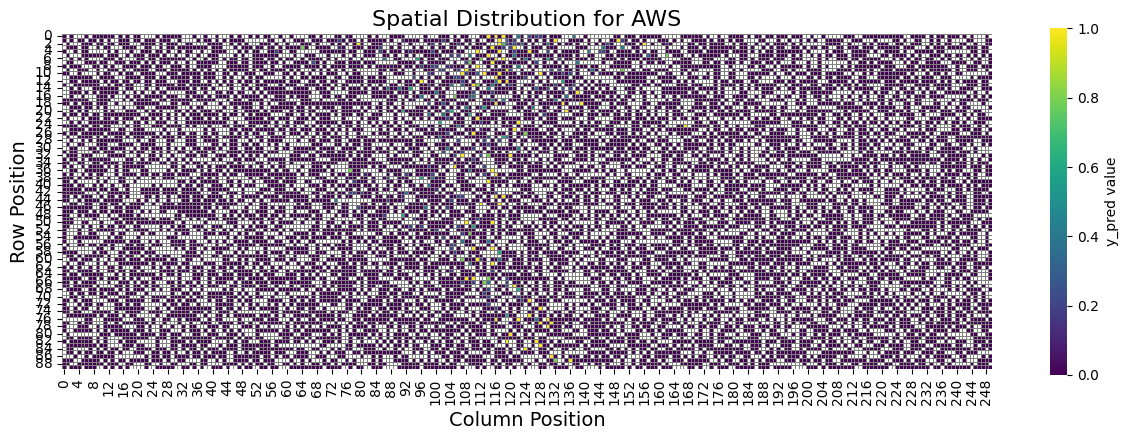

In [56]:
# Get the maximum row and column positions to define the matrix size
max_row = df_for_visualize_AWS['row'].max()
max_col = df_for_visualize_AWS['col'].max()

# Create an empty matrix filled with NaNs (will represent missing values)
matrix = np.full((max_row + 1, max_col + 1), np.nan)

# Fill the matrix with the y_pred values at the corresponding positions
for _, row in df_for_visualize_AWS.iterrows():
    matrix[row['row'].astype(int), row['col'].astype(int)] = row['y_pred_AWS']

# Create the heatmap with adjusted size and font size
plt.figure(figsize=(15, 9))  # Điều chỉnh kích thước biểu đồ
cmap = sns.color_palette("viridis", as_cmap=True)

# Use seaborn to create a heatmap
sns.heatmap(matrix, cmap=cmap, cbar=True, linewidths=.5, linecolor='gray', square=True,
            mask=np.isnan(matrix), cbar_kws={'label': 'y_pred value', 'shrink': 0.5})

# Set titles and labels with adjusted font size
plt.title('Spatial Distribution for AWS', fontsize=16)  # Điều chỉnh kích thước chữ
plt.xlabel('Column Position', fontsize=14)  # Điều chỉnh kích thước chữ
plt.ylabel('Row Position', fontsize=14)  # Điều chỉnh kích thước chữ

# Show the plot
plt.show()